https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

In [4]:
import pandas as pd

df=pd.read_csv('../data/heart.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.target.unique()

array([1, 0])

In [9]:
df.target.value_counts()
# 0 No heart Disease;   1- Heart Disease

target
1    165
0    138
Name: count, dtype: int64

In [10]:
df.shape[0]

303

In [11]:
# by gender

df.groupby("sex").target.agg(["count"]) /df.shape[0]

,count
sex,
0,0.316832
1,0.683168


In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<Axes: title={'center': 'Heart Disease Frequency'}, xlabel='target'>

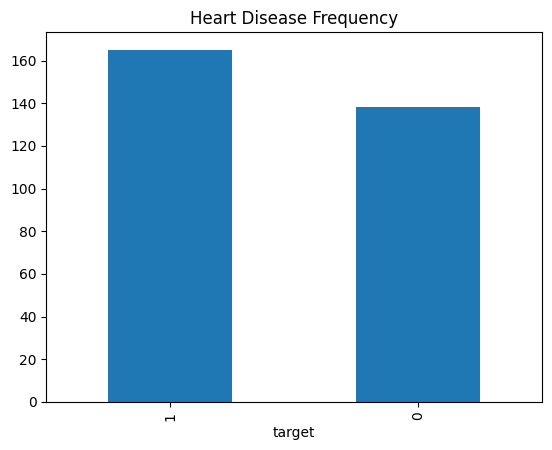

In [18]:
# plot df['target'].value_counts()
df['target'].value_counts().plot(kind='bar', title='Heart Disease Frequency')

In [19]:
pd.pivot_table(df, "age", columns="target")

target,0,1
age,56.601449,52.49697


In [20]:
pd.crosstab(df.age,df.target).head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


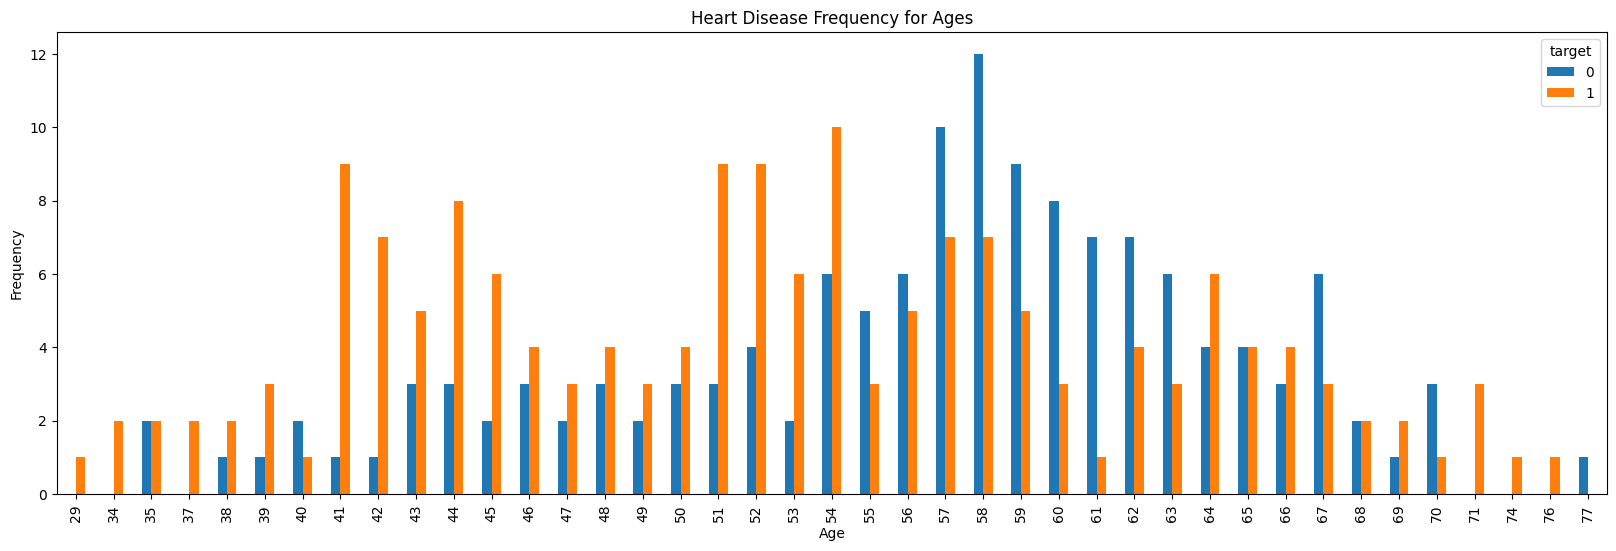

In [22]:
import matplotlib.pyplot as plt 
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

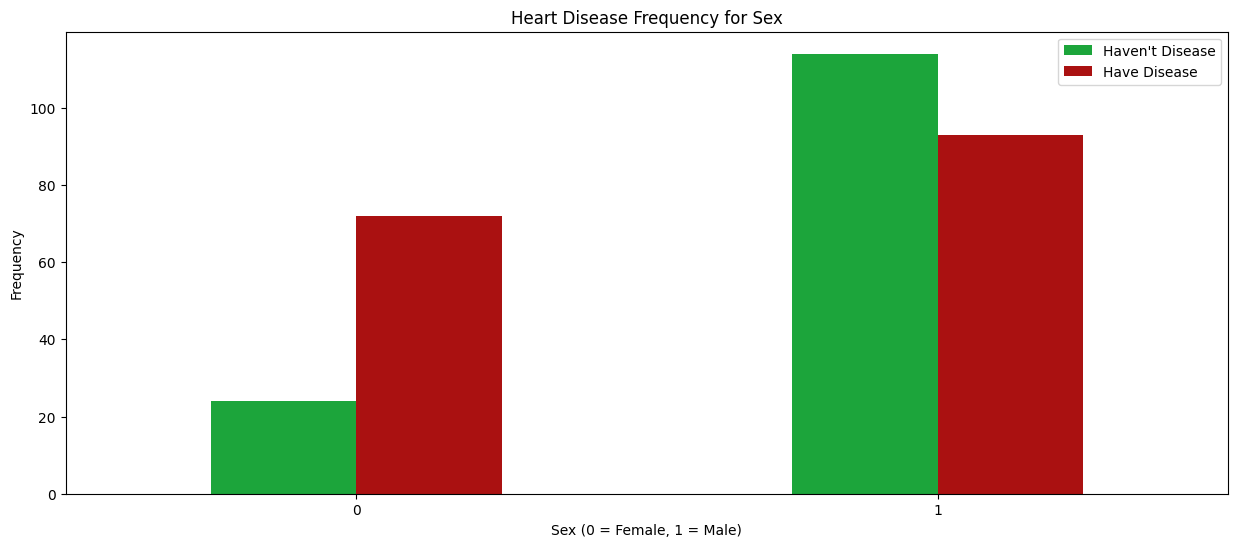

In [23]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

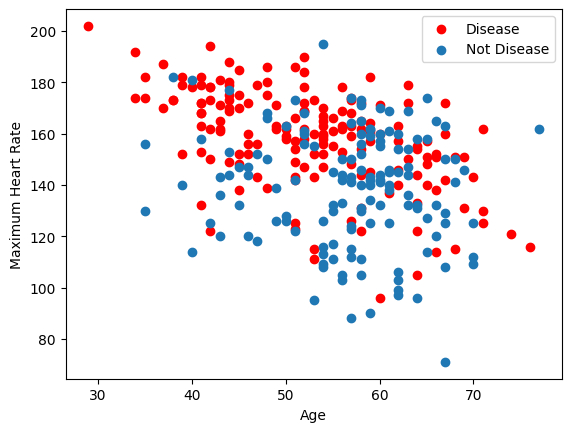

In [24]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

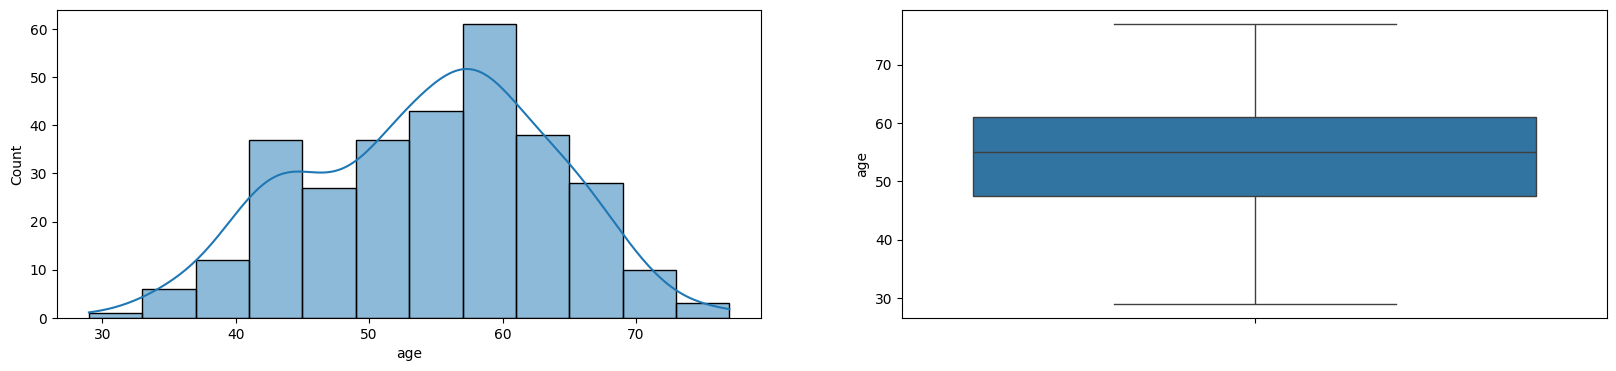

In [27]:
#Univariate analysis age.
import  seaborn as sns  

f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
_= sns.histplot(df['age'], kde=True)
f.add_subplot(1,2,2)
_= sns.boxplot(df['age'])

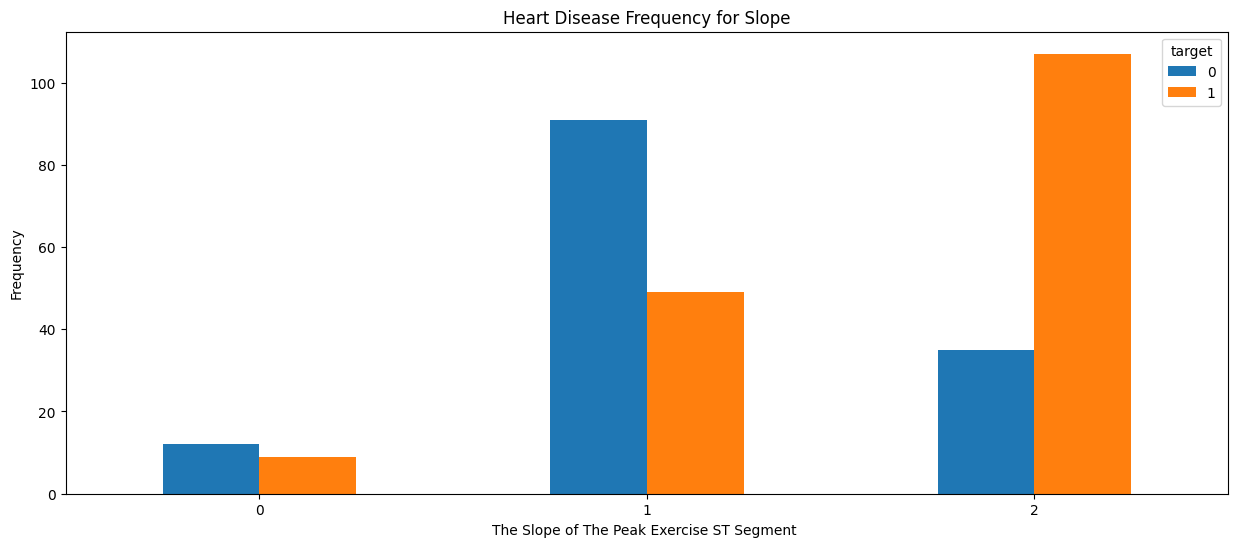

In [28]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))  
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

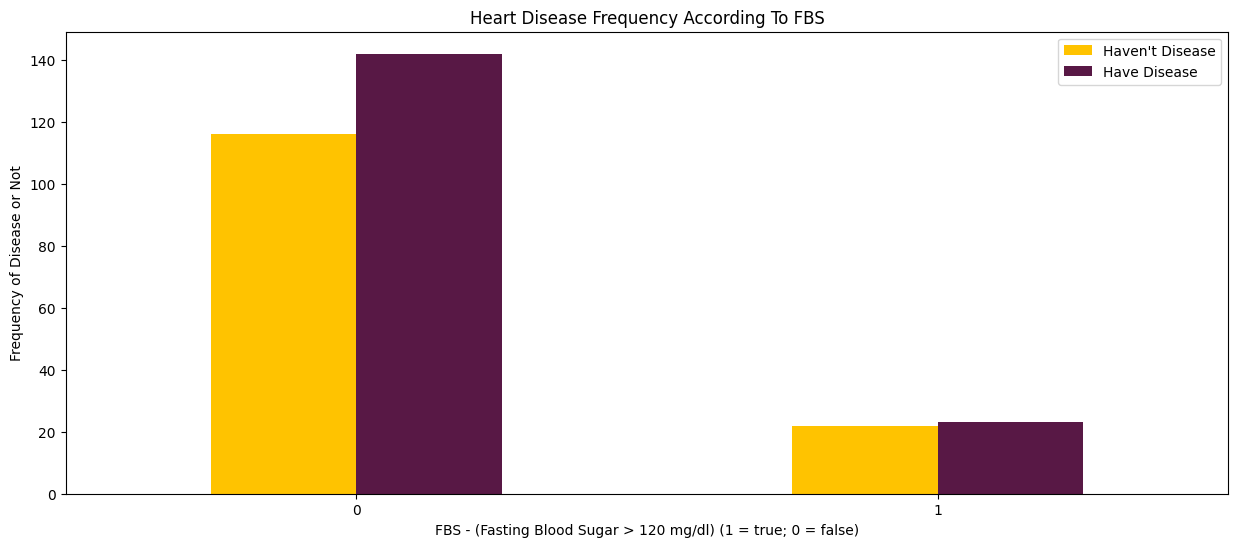

In [29]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

<Axes: ylabel='trestbps'>

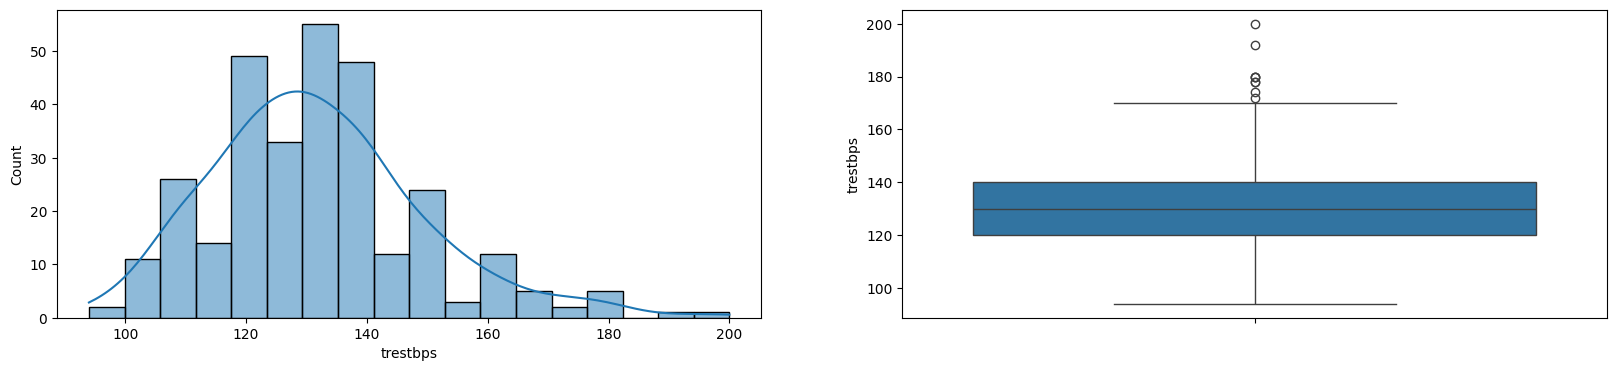

In [31]:
#Univariate analysis resting blood pressure (mm Hg) atau trestbps.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.histplot(df['trestbps'], kde=True)
f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

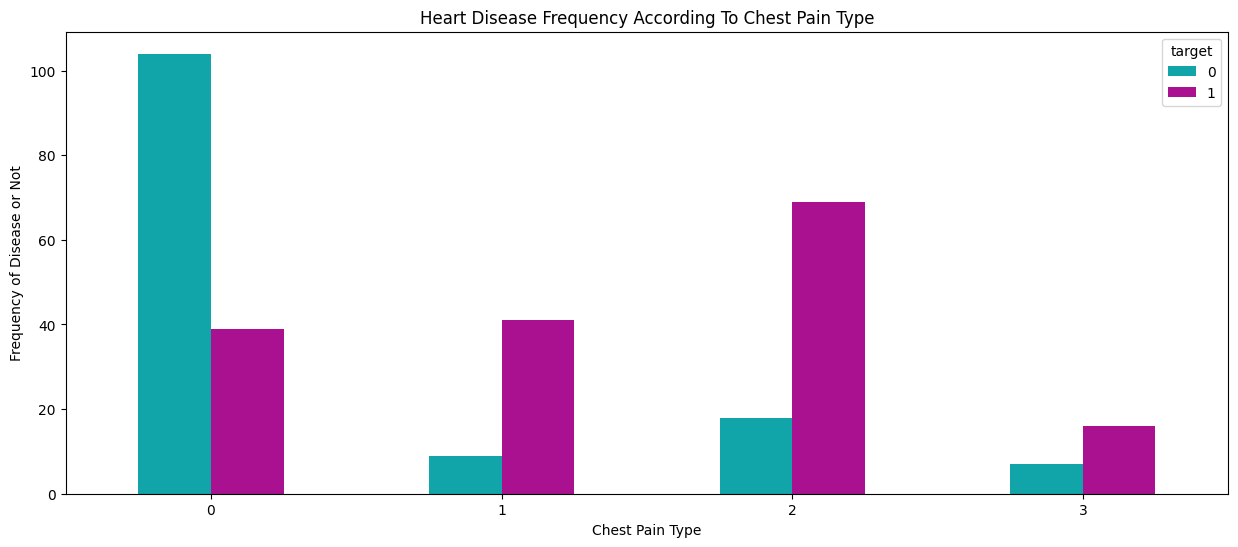

In [32]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

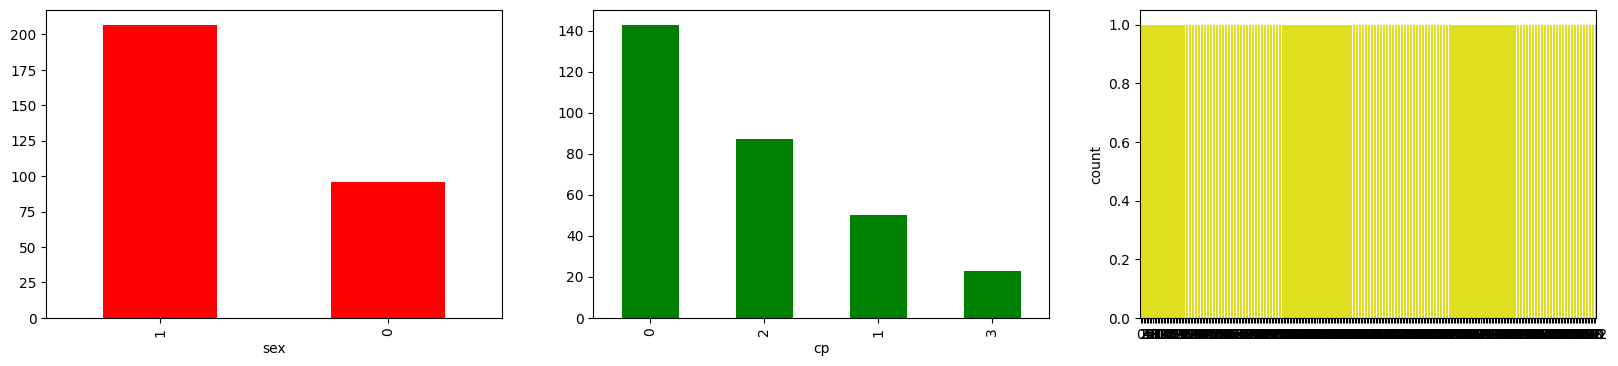

In [33]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
df['sex'].value_counts().plot(kind="bar", color='red')
f.add_subplot(1,3,2)
df['cp'].value_counts().plot(kind='bar', color='green')
f.add_subplot(1,3,3)
_=sns.countplot(df['fbs'], color='yellow')

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [34]:
X = df.drop('target', axis=1)
y = df.target

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=500></img>

In [37]:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
    MinMaxScaler( )    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    OneHotEncoder(drop="if_binary",sparse_output=False )  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
)

In [38]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train).shape

(227, 13)

In [39]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train)[10]

array([0.79166667, 1.        , 0.        , 0.06122449, 0.38799076,
       0.        , 0.        , 0.41221374, 1.        , 0.14516129,
       0.5       , 0.5       , 0.66666667])

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [40]:
from sklearn.neighbors import KNeighborsClassifier  
pipe_KNN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    KNeighborsClassifier( )  #    يعوض لاحقا ضمن المعايير أدناه 
)

In [41]:
from sklearn import set_config
set_config(display='diagram')

In [42]:
# تدريب البيانات
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b273e70fb30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b273e7af020>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [43]:
# قياس درجة  دقة  التنبؤ
f" Accurcary {pipe_KNN.score(X_test, y_test):.3}"
#  الاصلي  alpha   باعتمدنا  هنا على   معيار   

' Accurcary 0.868'

In [44]:
#pipeline  معايير  
list(pipe_KNN.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'kneighborsclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__transform_input',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__minmaxscaler',
 'columntransformer__pipeline-1__minmaxscaler__clip',
 'columntransformer__pipeline-1__minmaxscaler__copy',
 'columntransformer__pipeline-1__minmaxscaler__feature_range',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__transform_

<img src="https://i.ibb.co/2vW8dtL/hyper-Parameters.png" width=300></img>

In [45]:
import numpy as np
param_grid = {
    'kneighborsclassifier__leaf_size': np.arange(1,51),
    'kneighborsclassifier__n_neighbors': np.arange(1,30),
    'kneighborsclassifier__p' : [1,2]
}

In [46]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

In [48]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_KNN, param_distributions=param_grid, cv=kf, verbose=3, 
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="recall_score" )

In [49]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END kneighborsclassifier__leaf_size=18, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1; accuracy_score: (test=0.826) precision_score: (test=0.871) recall_score: (test=0.871) roc_auc: (test=0.802) total time=   0.0s
[CV 2/5] END kneighborsclassifier__leaf_size=18, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1; accuracy_score: (test=0.804) precision_score: (test=0.852) recall_score: (test=0.821) roc_auc: (test=0.800) total time=   0.0s
[CV 3/5] END kneighborsclassifier__leaf_size=18, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1; accuracy_score: (test=0.778) precision_score: (test=0.692) recall_score: (test=0.900) roc_auc: (test=0.790) total time=   0.0s
[CV 4/5] END kneighborsclassifier__leaf_size=18, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1; accuracy_score: (test=0.867) precision_score: (test=0.840) recall_score: (test=0.913) roc_auc: (te

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7b273e70fb30>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'kneighborsclassifier__p': [1, 2]},
                   refit='recall_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                            'precision_score': make_scorer(precision_score, response_method='predict'),
                            'recall_score': make_scorer(recall_score, response_method='predict'),
                            'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
                   verbose=3)

In [50]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_ 

{'kneighborsclassifier__p': 1,
 'kneighborsclassifier__n_neighbors': np.int64(21),
 'kneighborsclassifier__leaf_size': np.int64(7)}

In [51]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2740c30350>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2735e59490>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=np.int64(7),
                                      n_neighbors=np.int64(21), p=1))])

In [52]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.789'

In [53]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}' 

'Accuracy: 0.789'

In [54]:
# نسبة التنبؤ  بالمقارنة مع القيم الأصلية 
f'Accuracy: {recall_score(y_test, y_pred):.3}' 

'Accuracy: 0.86'

In [60]:
#  Precision / recall  بين    F1  يوازن معيار القيس  
from sklearn import metrics
f'Accuracy: {metrics.f1_score(y_test, y_pred):.3}' 

'Accuracy: 0.822'

In [61]:
f"Performance sur le train : {roc_auc_score(y_train, RdSearch.predict(X_train))} "

'Performance sur le train : 0.8453942232630757 '

In [62]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.779 '

In [63]:
f"Performance sur le Test : {recall_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.86 '

In [64]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.79      0.86      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



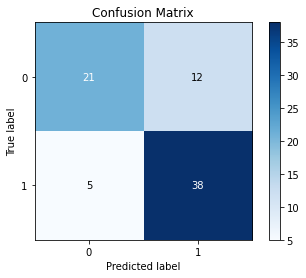

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

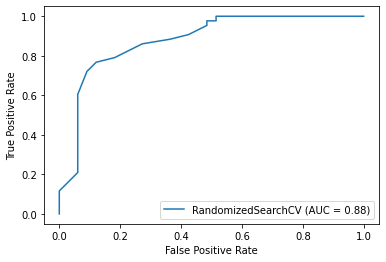

In [ ]:
metrics.plot_roc_curve(RdSearch, X_test, y_test)

In [ ]:
>>> kmeans = KMeans(random_state=1)
>>> skplt.cluster.plot_elbow_curve(kmeans, cluster_ranges=range(1, 30))